# Vad är målet och hur kan dom KPI:erna jag valt visa hur bra målet har uppnåtts?
Sverige påbörjade sin covid vaccination år 2020, med målet att se till att alla vuxna ska ha blivit erbjuden en dos. Hitills har 87.1% av dom som >=12 år fått minst en dos. 

Men i 2022, 2 år senare, är covid vaccination fortfarande en pågående process. 

[COVID-19 vaccination in Sweden](https://en.wikipedia.org/wiki/COVID-19_vaccination_in_Sweden)

In [12]:

import pandas as pd
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import plotly_express as px

infection_statistics_xls = pd.ExcelFile('Rådata/Folkhalsomyndigheten_Covid19.xlsx')
vaccine_statistics_xls = pd.ExcelFile('Rådata/Folkhalsomyndigheten_Covid19_Vaccine.xlsx')

## KPI 1:
### Vaccinations farten

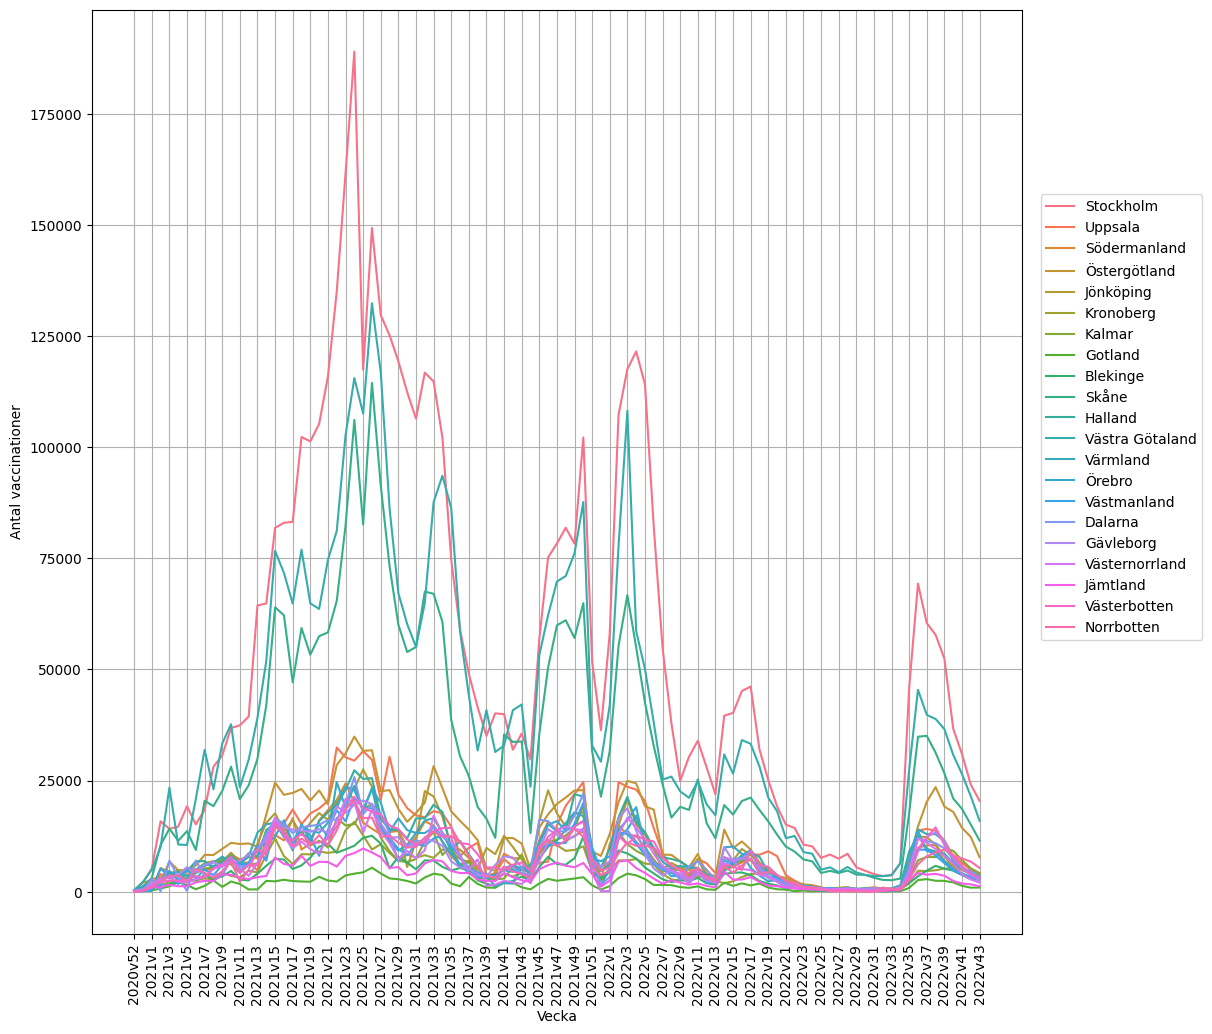

In [13]:
plt.figure(figsize=(12,12))
df = pd.read_excel(vaccine_statistics_xls, 'Vaccinationer tidsserie') # Denna excel flik har mer än nog med information för detta.
df['Vecka'] = [f'{year}v{week}' for year, week in zip(df.loc[:,'År'], df.loc[:,'Vecka'])] # Fixar en kolumn som håller koll på både år och vecka.
df = df.loc[df['Region'] != '| Sverige |'].reset_index() # Ta bort '| Sverige |' för att hålla grafen mer balanserad.

df_diff = df.copy() # Skapar en ny dataframe som ska hålla andra värden.

for index, row in df.iterrows():
    if (index-21) < 0: # Det finns 21st regioner, alltså måste dom första 21 elementen ignoreras.
       continue
    df_diff.at[index, 'Antal vaccinationer'] -= df.at[(index-21), 'Antal vaccinationer'] # Subtrahera med värdet från förra veckan för att få fram differensen.

fig = sns.lineplot(data=df_diff, x='Vecka', y='Antal vaccinationer', hue='Region')
plt.xticks(rotation=90) # Rotera x-axel namnen
plt.legend(bbox_to_anchor=(1.02, 0.8), loc='upper left', borderaxespad=0) # Justera legend-lådan
plt.grid()

# https://stackoverflow.com/questions/42103348/how-to-improve-spacing-of-labels-on-seaborn-axis 
# Med .set_xticks blev det fel på grafen, med .set_xticklabels blir det dålig mellanrum på namnen.
xticks = fig.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2:
        xticks[i].set_visible(False)


# Noter och kommentarer:
Denna graf visar antal vaccinationer, oberoende av vilken dos mängd det var. 
[Enligt 1177](https://www.1177.se/sjukdomar--besvar/lungor-och-luftvagar/inflammation-och-infektion-ilungor-och-luftror/om-covid-19--coronavirus/om-vaccin-mot-covid-19/vaccination-mot-covid-19-vilken-rekommendation-galler-for-mig/), så rekommenderas 3 doser för vuxna som inte har vaccinerat sig tidigare. Exakta rekommendationer varierar såklart mellan åldersgrupperna.
Från fliken 'Dos 1 till 3 per åldersgrupp' kan man avläsa att andelen vuxna som tagit minst 3 doser är ~66%.

## KPI 2: 
### Antal fall per vecka emot antal vaccinerade varje vecka
Den här KPI:n har syftet att mäta det påverkan som andel vaccinerade har haft på andel infekterade.
Detta må låta uppenbart - men detta tycker jag berättigas pg.a att:
* Fastän man är vaccinerad, så finns det ändå en risk att man får covid; Alltså betyder det att antalet vaccinerade är inte lika med antalet som inte fick covid.
* Man kan ha fått covid innan man vaccinerade sig.

I samband med denna KPI kommer också andra intressanta frågor att utforskas - t.ex. vilka åldrar ser ut att vara riskgrupper? Vilka dos mängder fungerar bäst för kommuner, osv.

## KPI 3: